In [21]:
# Use the given file and read the data
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
data = pd.read_csv('heart.csv')

In [22]:
# Display attributes and the first 10 rows
attributes = data.columns
print("Attributes in the dataset:", attributes)
print(data.head(10))

Attributes in the dataset: Index(['Srno', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG',
       'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')
   Srno  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     1   63    1       typical     145   233    1        2    150      0   
1     2   67    1  asymptomatic     160   286    0        2    108      1   
2     3   67    1  asymptomatic     120   229    0        2    129      1   
3     4   37    1    nonanginal     130   250    0        0    187      0   
4     5   41    0    nontypical     130   204    0        2    172      0   
5     6   56    1    nontypical     120   236    0        0    178      0   
6     7   62    0  asymptomatic     140   268    0        2    160      0   
7     8   57    0  asymptomatic     120   354    0        0    163      1   
8     9   63    1  asymptomatic     130   254    0        2    147      0   
9    10   53    1  asymptomatic     

Data Description:
              Srno         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.

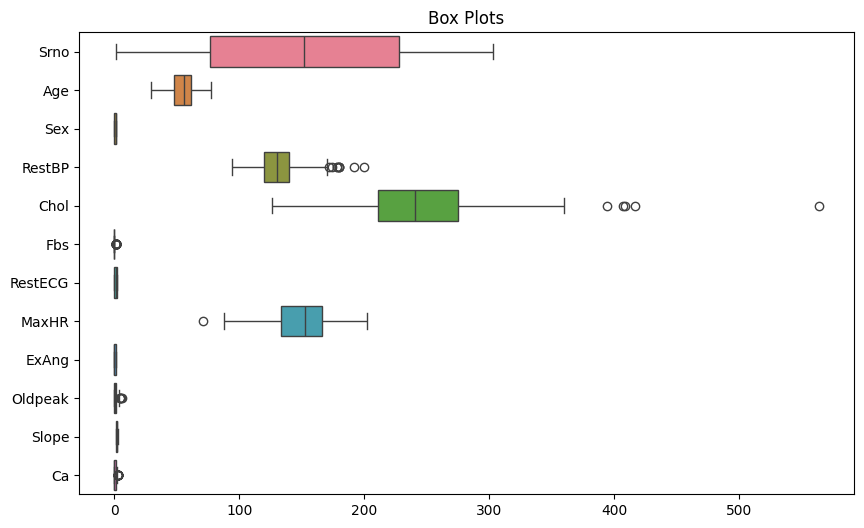

In [23]:
# Describe attributes and find outliers
data_description = data.describe()
print("Data Description:\n", data_description)

# Create box plots for numeric attributes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h")
plt.title("Box Plots")
plt.show()

In [24]:
# Find and handle outliers (you can define your own criteria)
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
             Srno         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std   

In [25]:
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
Srno           int64
Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object


In [26]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[int, float])

# Calculate the range for each numeric attribute
attribute_range = numeric_data.max() - numeric_data.min()
print("Range for Each Numeric Attribute:")
print(attribute_range)

Range for Each Numeric Attribute:
Srno       302.0
Age         48.0
Sex          1.0
RestBP     106.0
Chol       438.0
Fbs          1.0
RestECG      2.0
MaxHR      131.0
ExAng        1.0
Oldpeak      6.2
Slope        2.0
Ca           3.0
dtype: float64


In [27]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[int, float])

# Calculate quartiles for numeric attributes
quartiles = numeric_data.quantile([0.25, 0.5, 0.75])
print("Quartiles:")
print(quartiles)

# Calculate percentiles for numeric attributes
percentiles = numeric_data.quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("Percentiles:")
print(percentiles)


Quartiles:
       Srno   Age  Sex  RestBP   Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0.25   76.5  48.0  0.0   120.0  211.0  0.0      0.0  133.5    0.0      0.0   
0.50  152.0  56.0  1.0   130.0  241.0  0.0      1.0  153.0    0.0      0.8   
0.75  227.5  61.0  1.0   140.0  275.0  0.0      2.0  166.0    1.0      1.6   

      Slope   Ca  
0.25    1.0  0.0  
0.50    2.0  0.0  
0.75    2.0  1.0  
Percentiles:
       Srno   Age  Sex  RestBP   Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0.10   31.2  42.0  0.0   110.0  188.8  0.0      0.0  116.0    0.0      0.0   
0.25   76.5  48.0  0.0   120.0  211.0  0.0      0.0  133.5    0.0      0.0   
0.50  152.0  56.0  1.0   130.0  241.0  0.0      1.0  153.0    0.0      0.8   
0.75  227.5  61.0  1.0   140.0  275.0  0.0      2.0  166.0    1.0      1.6   
0.90  272.8  66.0  1.0   152.0  308.8  1.0      2.0  176.6    1.0      2.8   

      Slope   Ca  
0.10    1.0  0.0  
0.25    1.0  0.0  
0.50    2.0  0.0  
0.75    2.0  1.0  
0.90    2.0  2.0  


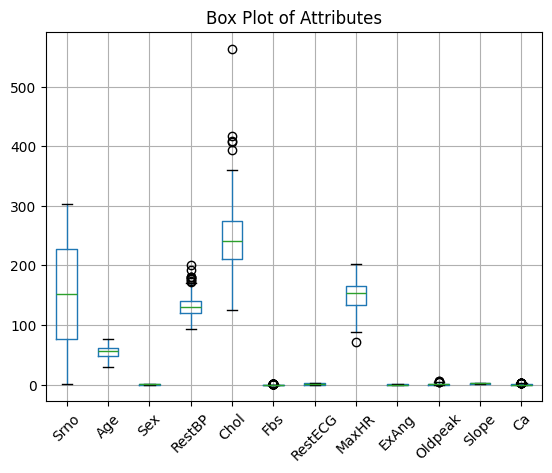

Outliers in Srno : Series([], Name: Srno, dtype: int64)
Outliers in Age : Series([], Name: Age, dtype: int64)
Outliers in Sex : Series([], Name: Sex, dtype: int64)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [35]:
import matplotlib.pyplot as plt

data.boxplot()
plt.title("Box Plot of Attributes")
plt.xticks(rotation=45)
plt.show()


def find_outliers(attribute):
    q1 = attribute.quantile(0.25)
    q3 = attribute.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = attribute[(attribute < lower_bound) | (attribute > upper_bound)]
    return outliers
    
outliers_info = {}
for column in data.columns:
    outliers_info[column] = find_outliers(data[column])
    print("Outliers in", column, ":", outliers_info[column])

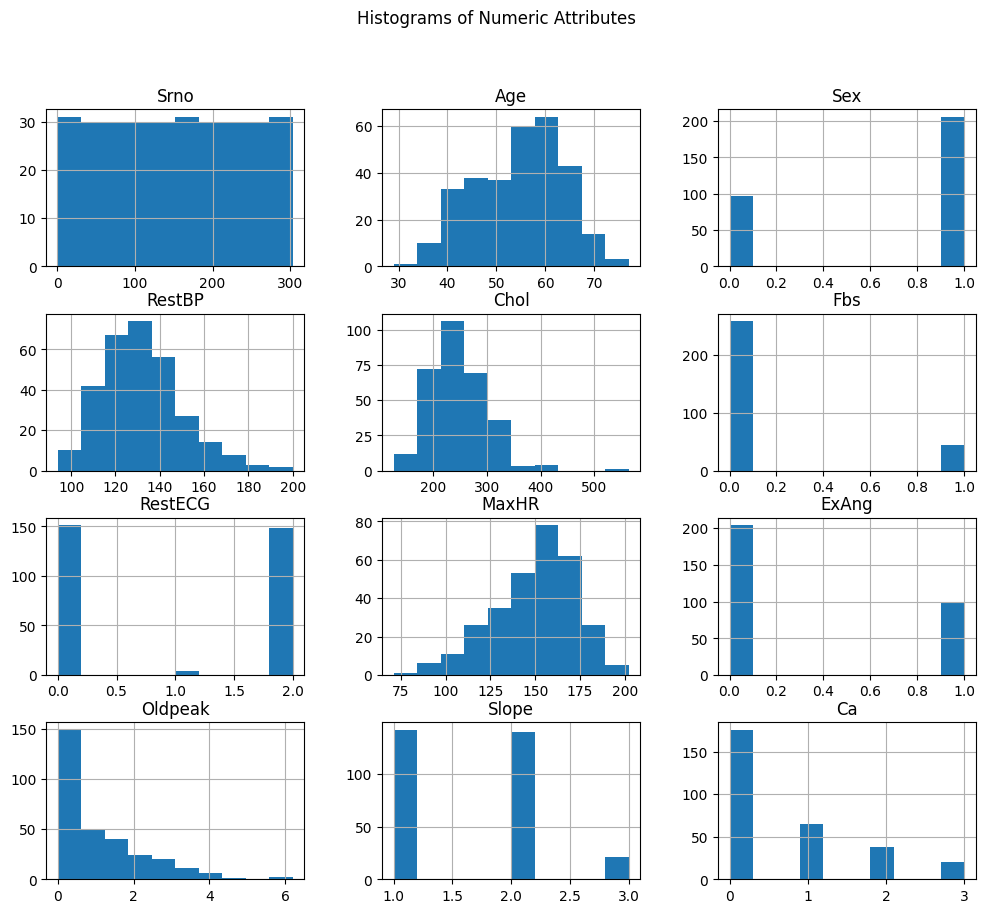

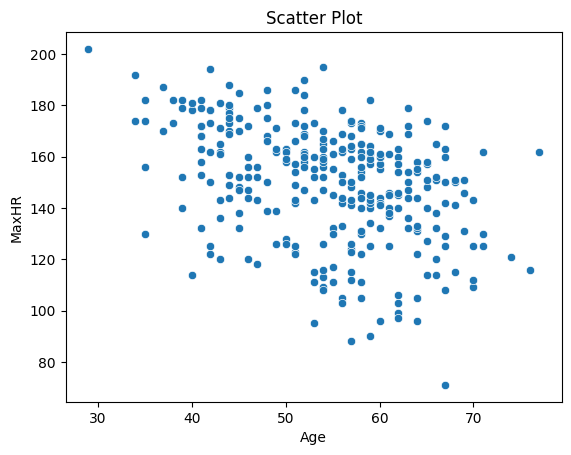

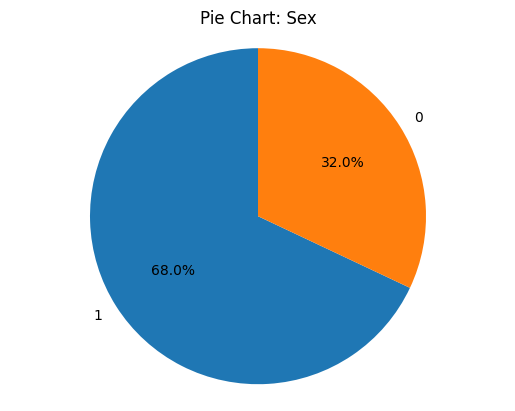

In [33]:
# Step 6: Data visualization
# Histograms
data.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numeric Attributes")
plt.show()

# Scatter plot (you need to choose columns for x and y)
sns.scatterplot(data=data, x='Age', y='MaxHR')
plt.title("Scatter Plot")
plt.show()

# Pie chart (requires appropriate data)
attribute_to_plot = 'Sex'
attribute_counts = data[attribute_to_plot].value_counts()
plt.pie(attribute_counts, labels=attribute_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(f'Pie Chart: {attribute_to_plot}')
plt.show()

In [34]:
# Step 7: Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'typical'